In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [334]:
import nltk # valuable for nlp tasks
from nltk.corpus import stopwords  # removal of common words
import string # for knowing puncutation
from nltk.stem.porter import PorterStemmer  # for getting root words

In [335]:
df=pd.read_csv('email_spam_classification.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [337]:
df.shape

(5572, 2)

In [338]:
df.isnull().sum()

,0
Category,0
Message,0


In [339]:
df['Message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [340]:
df.duplicated().sum()

415

In [341]:
df.drop_duplicates(inplace=True)

In [342]:
df.shape

(5157, 2)

In [343]:
df.describe()

,Category,Message
count,5157,5157
unique,2,5157
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [344]:
----------------------------

SyntaxError: invalid syntax (<ipython-input-344-6443b3140f5e>, line 1)

In [507]:
# EDA

In [347]:
df['Category'].value_counts()  # Unbalanced data


,count
Category,
ham,4516
spam,641


<Axes: xlabel='Category'>

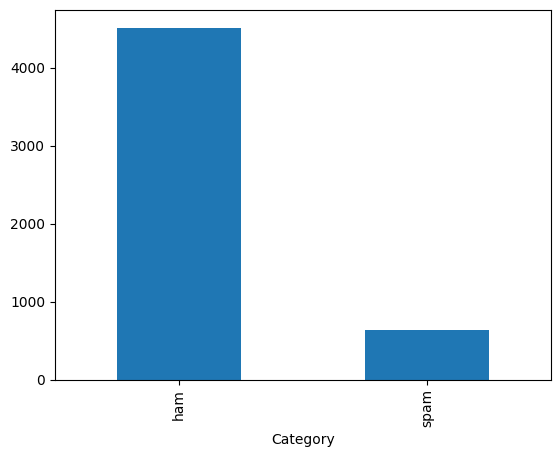

In [348]:
df['Category'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

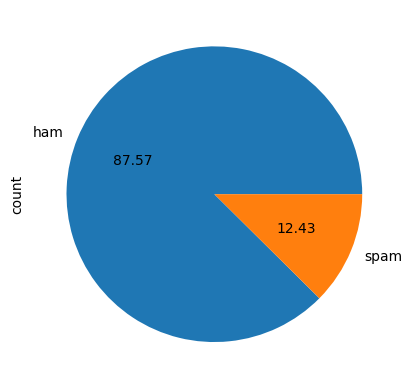

In [349]:
df['Category'].value_counts().plot(kind='pie',autopct='%0.2f')

In [350]:
import nltk

In [351]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [352]:
df['total_characters']=df['Message'].apply(lambda x:len(x))

In [353]:
df

,Category,Message,total_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [354]:
df['total_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [355]:
df

,Category,Message,total_characters,total_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35
5568,ham,Will ü b going to esplanade fr home?,36,9
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15
5570,ham,The guy did some bitching but I acted like i'd...,125,27


In [356]:
df['total_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [357]:
df

,Category,Message,total_characters,total_words,total_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,ham,Will ü b going to esplanade fr home?,36,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [358]:
df[['total_characters','total_words','total_sentences',]].corr()

,total_characters,total_words,total_sentences
total_characters,1.000000,0.966155,0.622428
total_words,0.966155,1.000000,0.679396
total_sentences,0.622428,0.679396,1.000000


In [359]:
df

,Category,Message,total_characters,total_words,total_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,ham,Will ü b going to esplanade fr home?,36,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [360]:
# comparing all these with target column

In [361]:
df['target']=df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [362]:
df

,Category,Message,total_characters,total_words,total_sentences,target
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0
1,ham,Ok lar... Joking wif u oni...,29,8,2,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1
3,ham,U dun say so early hor... U c already then say...,49,13,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35,4,1
5568,ham,Will ü b going to esplanade fr home?,36,9,1,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,0
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,0


In [363]:
df[['total_characters','total_words','total_sentences','target']].corr()

,total_characters,total_words,total_sentences,target
total_characters,1.000000,0.966155,0.622428,0.374409
total_words,0.966155,1.000000,0.679396,0.255968
total_sentences,0.622428,0.679396,1.000000,0.259023
target,0.374409,0.255968,0.259023,1.000000


In [364]:
r=df[['total_characters','total_words','total_sentences','target']].corr()

<Axes: >

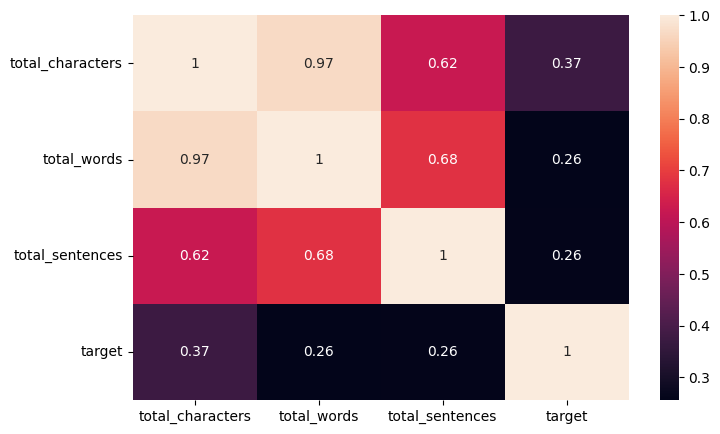

In [365]:
plt.figure(figsize=(8,5))
sns.heatmap(r,annot=True)

In [ ]:
# Text Preprocessing

In [366]:

#lower case ,tokenization ,removing special characters, removing stop words and punctuation , stemming

In [367]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [368]:
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [369]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [370]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [371]:
from bs4 import BeautifulSoup

In [372]:
def html_tag_remover(giventext):
    soup = BeautifulSoup(giventext, "html.parser")
    return soup.get_text()


In [373]:
df['Message']=df['Message'].apply(html_tag_remover)

<ipython-input-372-60c98c8028b7>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(giventext, "html.parser")


In [374]:
pip install emoji

In [375]:
import emoji

In [376]:
def emoji_remover(text):
    return emoji.demojize(text)

In [377]:
df['Message']=df['Message'].apply(emoji_remover)

In [378]:
def correct_text(giventext):
    giventext=giventext.lower()  # lower casing
    giventext=nltk.word_tokenize(giventext)  # converting into word token
    a=[]
    for j in giventext:
        if j.isalnum():   # should contan alphabets and numbers
            a.append(j)
    giventext=a[:]
    a.clear()

    for j in giventext:
        if j not in stopwords.words('english') and j not in string.punctuation:  # sentence should not contain stopwords and punctuations
            a.append(j)
    giventext=a[:]
    a.clear()

    for j in giventext:
        a.append(ps.stem(j))   # converting in root words
    return " ".join(a)


In [379]:
df['Message'].apply(correct_text)

,Message
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,ü b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [380]:
df['main_text']=df['Message'].apply(correct_text)

In [508]:
from wordcloud import WordCloud  #will show the important words

In [382]:
gh=WordCloud(width=400,height=400,min_font_size=10,background_color='white')

In [383]:
spam_words=gh.generate(df[df['target']==1]['main_text'].str.cat(sep=" "))

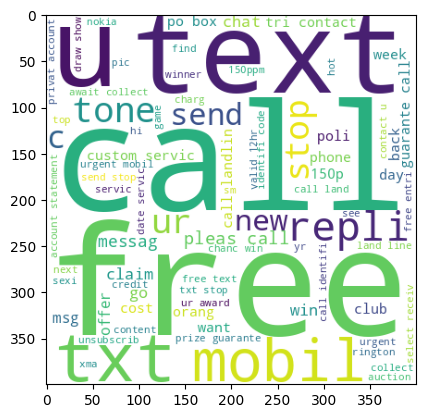

In [384]:
plt.imshow(spam_words)

In [385]:
ham_words=gh.generate(df[df['target']==0]['main_text'].str.cat(sep=" "))

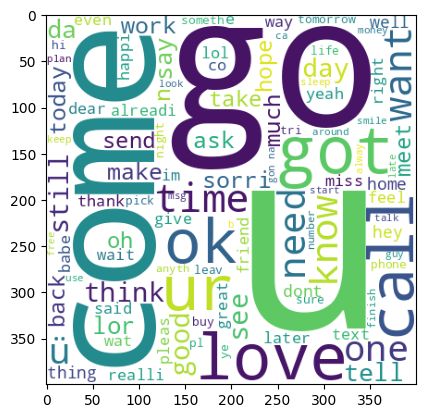

In [386]:
plt.imshow(ham_words)

In [387]:
# --> Top 15 occured words from ham and spam

In [388]:
hk=df[df['target']==0]['main_text'].tolist()
hk

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine way u feel way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'ü pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love',
 'back pa

In [389]:
most_occured_ham_words=[]
for i in hk:
    for j in i.split():
        most_occured_ham_words.append(j)


In [390]:
from collections import Counter
Counter(most_occured_ham_words).most_common(15)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 218),
 ('good', 215),
 ('want', 209),
 ('ur', 203)]

In [391]:
jkl=pd.DataFrame(Counter(most_occured_ham_words).most_common(15))
jkl

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,come,278
5,got,239
6,know,237
7,like,236
8,call,235
9,love,222


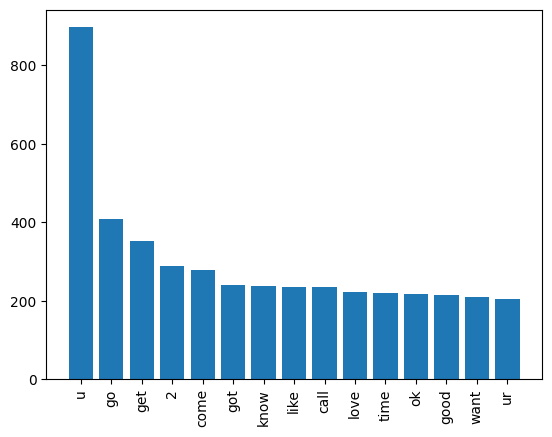

In [392]:
plt.bar(jkl[0],jkl[1])
plt.xticks(rotation='vertical')
plt.show()

In [393]:
hkg=df[df['target']==1]['main_text'].tolist()
hkg

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [394]:
most_occured_spam_words=[]
for ig in hkg:
    for jg in ig.split():
        most_occured_spam_words.append(jg)

In [395]:
from collections import Counter
Counter(most_occured_spam_words).most_common(15)

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64)]

In [396]:
jk=pd.DataFrame(Counter(most_occured_spam_words).most_common(15))
jk

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


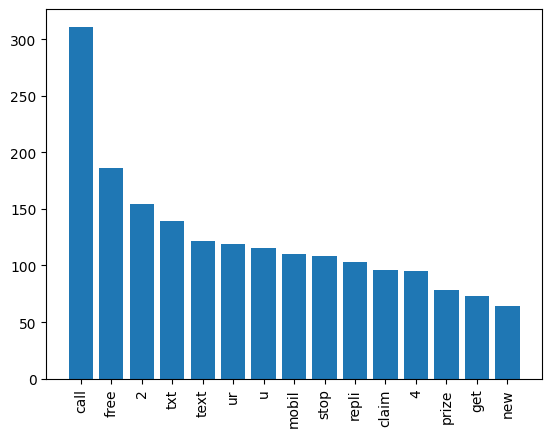

In [397]:
plt.bar(jk[0],jk[1])
plt.xticks(rotation='vertical')
plt.show()

In [398]:
df

,Category,Message,total_characters,total_words,total_sentences,target,main_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,nah think goe usf live around though
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35,4,1,2nd time tri 2 contact u pound prize 2 claim e...
5568,ham,Will ü b going to esplanade fr home?,36,9,1,0,ü b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,0,piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,0,guy bitch act like interest buy someth els nex...


In [399]:
df

,Category,Message,total_characters,total_words,total_sentences,target,main_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,nah think goe usf live around though
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35,4,1,2nd time tri 2 contact u pound prize 2 claim e...
5568,ham,Will ü b going to esplanade fr home?,36,9,1,0,ü b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,0,piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,0,guy bitch act like interest buy someth els nex...


In [400]:
from sklearn.model_selection import train_test_split

In [401]:
df.columns

Index(['Category', 'Message', 'total_characters', 'total_words',
       'total_sentences', 'target', 'main_text'],
      dtype='object')

In [402]:
x=df.drop(columns=['Category', 'Message', 'total_characters', 'total_words',
       'total_sentences', 'target'])

In [403]:
x

,main_text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,ü b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [419]:
y=df['target'].values

In [420]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [433]:
len(y)

5157

In [421]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [434]:
len(x_train)

4125

In [436]:
len(y_train)

4125

In [440]:
x_train

,main_text
2598,got fujitsu ibm hp toshiba got lot model say
5418,realli master
99,see cup coffe anim
2321,pain could come wors time
2388,also piec
...,...
4750,thanx u darlin im cool thanx bday drink 2 nite...
474,want 2 get laid tonight want real dog locat se...
3273,moon come color dream star make music sm give ...
4022,pick rayan macleran


In [443]:
text_data=x_train['main_text'].tolist()

In [464]:
text_data_hai=x_test['main_text'].tolist()

In [444]:
len(text_data)

4125

In [437]:
# text vectorization
#using Tfidf # captures the importanceof words in a document relative to a collection of documents.

In [445]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [446]:
tf=TfidfVectorizer(input='content')

In [447]:
x_train_tf=tf.fit_transform(text_data)
x_train_tf.shape[0]

4125

In [448]:
x_train_tf

<4125x5978 sparse matrix of type '<class 'numpy.float64'>'
	with 32074 stored elements in Compressed Sparse Row format>

In [465]:
x_test_tf=tf.transform(text_data_hai)
x_test_tf

<1032x5978 sparse matrix of type '<class 'numpy.float64'>'
	with 7349 stored elements in Compressed Sparse Row format>

In [466]:
len(y_train)

4125

In [467]:
# apply SMOTE to balance the dataset  # SMOTE works on numerical data
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train_tf,y_train)

[link text](https://)

In [468]:
# MODEL TRAINING - APPLYING ALGORITHMS
# SVC, GaussianNB,MultinomialNB,BernoulliNB,RandomForestClassifier

In [509]:
from sklearn.svm import SVC

In [470]:
cla=SVC()

In [471]:
cla.fit(x_train_resampled,y_train_resampled)

SVC()

In [472]:
y_pred=cla.predict(x_test_tf)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [499]:
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix

In [476]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))


0.9777131782945736
0.9669421487603306


In [479]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [480]:
from sklearn.ensemble import RandomForestClassifier

In [487]:
x_train_resampled_dense=x_train_resampled.toarray()
x_train_resampled_dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [491]:
x_test_tf_dense=x_test_tf.toarray()
x_test_tf_dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [486]:
g=GaussianNB()

In [488]:
g.fit(x_train_resampled_dense,y_train_resampled)

GaussianNB()

In [494]:
y_pred2=g.predict(x_test_tf_dense)
y_pred2

array([0, 1, 0, ..., 0, 0, 0])

In [495]:
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.8798449612403101
0.5265486725663717


In [497]:
m=MultinomialNB()

In [502]:
m.fit(x_train_resampled_dense,y_train_resampled)
y_pred3=m.predict(x_test_tf_dense)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

print(confusion_matrix(y_test,y_pred3))

0.9563953488372093
0.7692307692307693
[[857  39]
 [  6 130]]


In [501]:
b=BernoulliNB()

In [503]:
b.fit(x_train_resampled_dense,y_train_resampled)
y_pred4=b.predict(x_test_tf_dense)
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

print(confusion_matrix(y_test,y_pred4))

0.9806201550387597
0.9754098360655737
[[893   3]
 [ 17 119]]


In [505]:
rf=RandomForestClassifier()

In [506]:
rf.fit(x_train_resampled_dense,y_train_resampled)
y_pred5=rf.predict(x_test_tf_dense)
print(accuracy_score(y_test,y_pred5))
print(precision_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

0.9796511627906976
0.9831932773109243
[[894   2]
 [ 19 117]]
